**Major Crimes in Pittsburgh Neighbourhoods**  
Dataset: "Arrests for Major Crimes, 1972" (WPRDC)  
File: 8ce92a4b-fa62-45c3-8cee-cc58fefede75.csv  

In [2]:
# Imports (Also did !pip install (name), drop the ! if your doing it in terminal)
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sens



In [3]:
#Loading the dataset
crime = pd.read_csv("8ce92a4b-fa62-45c3-8cee-cc58fefede75.csv")
crime.head()


,_id,neighborhood,population,overall_crime_rate,number_arrests_murder,crime_rate_murder,number_arrests_rape,crime_rate_rape,number_arrests_robbery,crime_rate_robbery,number_arrests_assault,crime_rate_assault,number_arrests_burglary,crime_rate_burglary,number_arrests_larceny,crime_rate_larceny
0,1,31st Ward,7594,2.03,0,0.00,1,0.01,7,0.09,45,0.60,55,0.73,45,0.60
1,2,Allegheny Center,588,52.04,0,0.00,2,0.34,24,4.08,30,5.10,14,2.38,236,40.14
2,3,Allegheny West,1159,14.33,1,0.09,3,0.26,16,1.38,17,1.47,53,4.57,76,6.56
3,4,Allentown,5042,3.13,0,0.00,1,0.08,23,0.46,41,0.81,48,0.95,45,0.89
4,5,Arlington,4758,2.50,0,0.00,0,0.00,7,0.15,33,0.69,44,0.92,35,0.74


In [4]:
#Accounting for complications with dataset

#Accounting for blanks (filled with zero)
crime = crime.fillna(0)

#Determining the "Weighted" scale of each crime, kinda subjective

crime['weighted_crime'] = (
    crime['number_arrests_murder'] * 5 +
    crime['number_arrests_rape'] * 4 +
    crime['number_arrests_robbery'] * 3 +
    crime['number_arrests_assault'] * 2 +
    crime['number_arrests_burglary'] * 1.5 +
    crime['number_arrests_larceny'] * 1
)

# Sorts by the highest to lowest weighted crime score (that I assigned above)

crime_sorted = crime[['neighborhood', 'weighted_crime']].sort_values(
    by='weighted_crime', ascending=False
).reset_index(drop=True)

#Display stuff
print(f"Total Neighborhoods: {crime.shape[0]}")
print(crime_sorted.to_string(index=False))

print("\nNote: Higher weighted crime scores indicate that the neighborhood has more frequent severe crimes")

Total Neighborhoods: 70
                        neighborhood  weighted_crime
                           Shadyside          1921.0
     Squirrel Hill - South of Forbes          1473.5
                       North Oakland          1345.0
                         Middle Hill          1319.5
                  Central North Side          1273.5
     Squirrel Hill - North of Forbes          1182.5
                      Homewood South          1077.0
                        East Liberty          1027.0
                     Terrace Village           978.0
                       Lower Oakland           961.5
 Mount Washington - Duquesne Heights           912.5
                     Southside Flats           876.5
                         Perry South           866.0
                          Bloomfield           859.0
                          Manchester           827.0
                            Garfield           699.5
                           The Bluff           661.0
       Hazelwood-Glenw

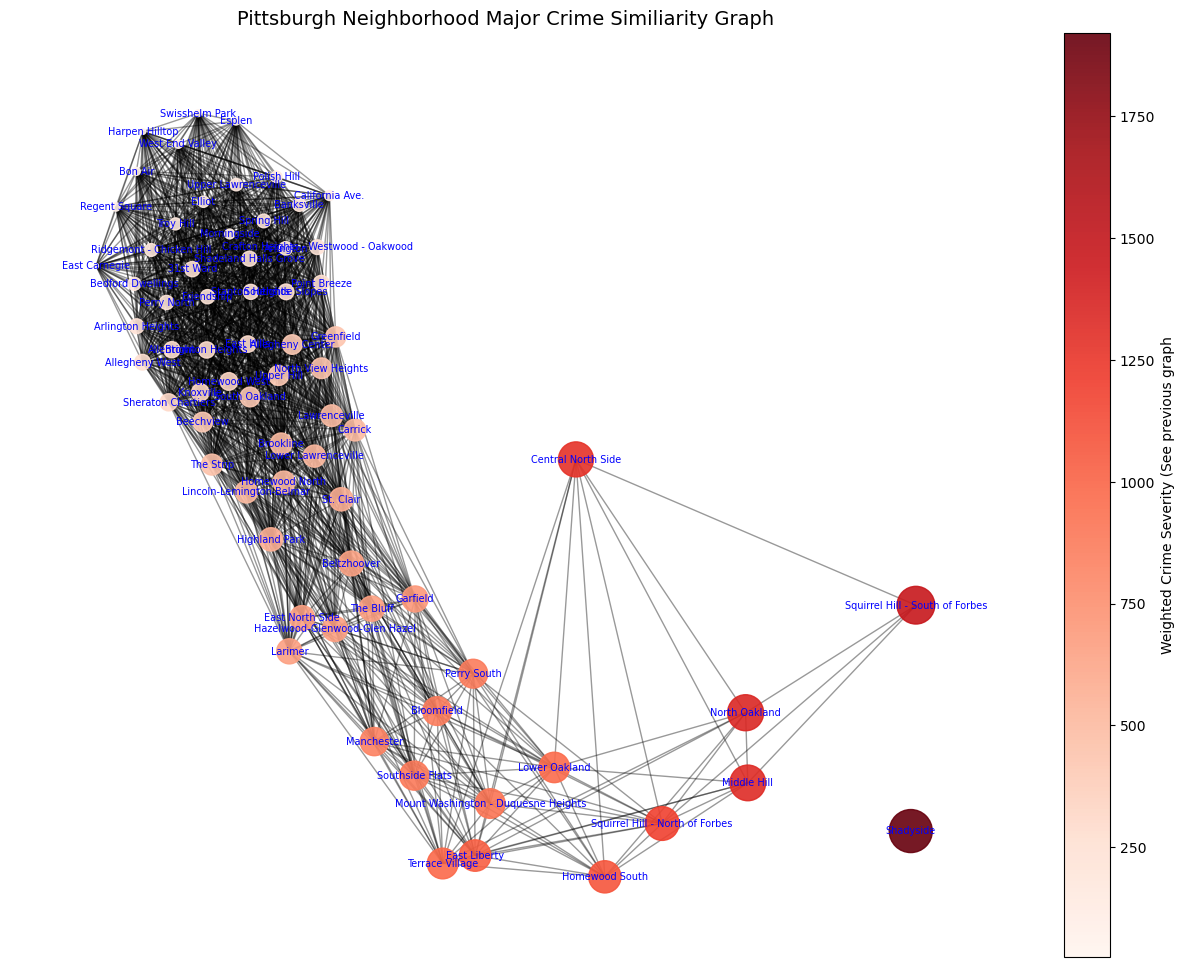

In [5]:
G = nx.Graph()

#Nodes Nodes Nodes!
for _, row in crime.iterrows():
    G.add_node(row['neighborhood'], weight=row['weighted_crime'])


#Edges

for i, row_i in crime.iterrows():
    for j, row_j in crime.iterrows():
        if i < j:
            similarity = 1 - abs(row_i['weighted_crime'] - row_j['weighted_crime']) / max(crime['weighted_crime'])
            if similarity > 0.8:
                G.add_edge(row_i['neighborhood'], row_j['neighborhood'], weight=similarity)

#Graph visuals
plt.figure(figsize=(16,12))
pos = nx.spring_layout(G, seed=42, k=0.7)

#Node colouring that vary based on the weighted crime levels
node_weights = [crime.loc[crime['neighborhood'] == node, 'weighted_crime'].values[0] for node in G.nodes]
node_sizes = [w / 2 for w in node_weights]
node_colors = node_weights

#Network itself
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Reds, alpha=0.9
)
edges = nx.draw_networkx_edges(G, pos, alpha=0.4)
labels = nx.draw_networkx_labels(G, pos, font_size=7, font_color='blue')

#Titling and Colour Grades

plt.colorbar(nodes, label="Weighted Crime Severity (See previous graph")
plt.title("Pittsburgh Neighborhood Major Crime Similiarity Graph", fontsize=14)
plt.axis('off')
plt.show()


**Explanation of Tables and Graphs**

This particular dataset, titled “Arrests for Major Crimes, 1972,” records the number of arrests for serious crimes across 70 Pittsburgh neighbourhoods. Each crime type, including murder, rape, robbery, assault, burglary, and larceny, was assigned a severity weight so that I could calculate a single weighted crime score for each neighbourhood. The higher the score, the worse off the neighbourhood is in terms of crime.

For the first table, I simply sorted the neighbourhoods using this weighted system. This helps visualise the data more clearly for someone unfamiliar with the neighbourhoods, since they do not need any prior knowledge of the area’s history or context, only the table itself.

This actually leads into the next graph, which visualises the neighbourhoods as nodes within a crime similarity network, similar to the networking project. Neighbourhoods with similar crime patterns are connected and positioned close together, forming clusters that reflect how similar their crime severity levels are. It is important to note that the layout is not geographic and is purely based on similarity, which confused me at first even as the one who made it. Essentially, nodes that are positioned closer together have more alike crime profiles.

I made this graph to address the limitations of looking only at the numbers in the table above. It can be difficult to grasp what those figures mean in reality. When you simply see a large number, you might assume the area is overwhelmed by crime, when in truth it may not be much higher than others with lower overall crime rates. Additionally, this method allows for the overlaying of other information, as you can look up the population of an area or any other metric and see if it lines up with other similar neighbourhoods in regards to those metrics.

In addition, this type of graph is most ideal, as other graphs suffer from the same terrible tendencies that often confuse the onlooker. I originally considered something more akin to a bar graph but ultimately chose this due to the reasoning mentioned above.



**Conclusion**  

Purely in terms of lowest crime rate the best neighbourhood from this dataset would be East Carnegie, it had the lowest score and was the most connected towards other neighbourhoods with consistent low crimes rates, additionally when you observe the tsv file you find it also has the lowest amount of "low" level crimes in terms of weight.